In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
import scipy.stats as stat
import pandas as pd

In [2]:
# Making Linear Regression class from skretch
class LinearRegression_local:
    
    def __init__(self):
        self.coeff_ = None
        self.intercept_ = None
        self.m = 0
        self.b = 0
        self.learning_rate = 0.1
        self.epoch = 300
        

    def fit_simple_regression(self,x_train,y_train): 
        numerator = 0
        denominator = 0
        for i in range(x_train.shape[0]): 
            numerator += (y_train[i] - y_train.mean())*(x_train[i]-x_train.mean())
            denominator += (x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())

        self.coeff_ = numerator/denominator
        self.intercept_ = y_train.mean()-(self.coeff_*x_train.mean())
        return self.coeff_,self.intercept_

    def fit_multiple_linear_regression_ndimension(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        beta = np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T,y_train)
        self.coeff_ = beta[1:]
        self.intercept_ = beta[0]

    def mean_error(self,y_test,y_hat):
        return np.sum((np.abs(y_test-y_hat)))/y_test.shape[0]

    def mean_squared_error(self,y_test,y_hat):
        return np.sum((np.square(y_test-y_hat)))/y_test.shape[0]

    def r2_score(self,y_hat,y_test):
        num = np.mean(np.square(y_test - np.mean(y_test)))
        den = np.mean(np.square(y_hat-y_test))
        return (1-(num/den))

    def r2_score_adjusted(self,y_hat,y_test):
        num = (np.square(y_test - np.mean(y_test)))/y_test.shape[0]
        den = (np.square(y_hat-y_test))/y_test.shape[0]
        r2 = (1-(num/den)) 
        n = y_test.shape[0]
        k = y_test.shape[1]
        return 1-((1-r2)*(n-1))/(n-1-k)
    
    def predict(self,x_test):
        # a = np.ones(x_test.shape)
        # for i in range(a.shape[0]-1):
        #     a[i][0] = self.coeff_*x_test[i] + self.intercept_
        return self.coeff_*x_test + self.intercept_
    

In [3]:
df = pd.read_csv('datasets/placement.csv')
df.head(5)


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(df["cgpa"], df["package"], test_size=0.2, random_state=42)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.7730984312051673

In [5]:
ll = LinearRegression_local()
ll.fit_simple_regression(x_train.values,y_train.values)
y_prediction = ll.predict(x_test.values)
r2_score(y_test,y_prediction)

0.7730984312051673

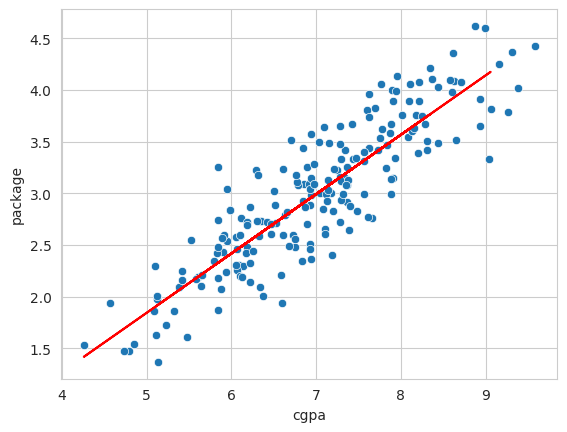

In [6]:
sns.scatterplot(data= df,x='cgpa',y='package')
plt.plot(x_test,ll.predict(x_test.values),color = 'red')